In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model # Corrigido: linear model -> linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier # Corrigido: neighboors -> neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

In [3]:
train = pd.read_csv('train.csv')


In [4]:
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
passengerId =  test['PassengerId']

titanic_df = pd.concat([train, test], ignore_index =  True)

In [14]:
train_index = len(train)
test_index = len(titanic_df) - len(test)

In [15]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [16]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [17]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [18]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [19]:
df = pd.DataFrame()

#SURVIVED


In [20]:
titanic_df['Survived'].nunique()

2

In [21]:
titanic_df['Survived'].unique()

array([ 0.,  1., nan])

In [22]:
titanic_df['Survived'].isnull().sum()

np.int64(418)

In [23]:
titanic_df['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

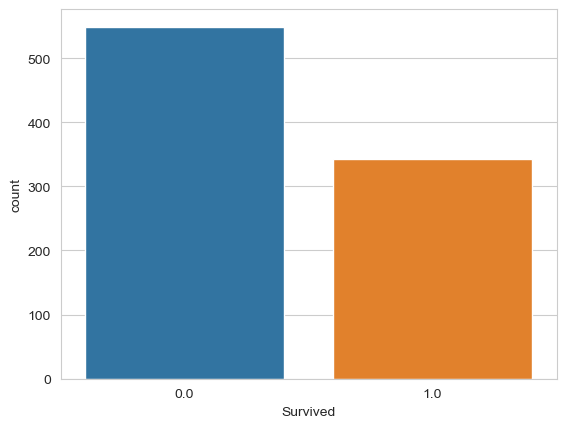

In [24]:
sns.countplot(data= titanic_df, x = 'Survived', hue='Survived', legend=False )

Quantidade de valores únicos: 2

Quais são os valores únicos: [ 0.  1. nan]

Quantidade de valores nulos: 418

Quantidade por opção: 
Survived
0.0    549
1.0    342
Name: count, dtype: int64


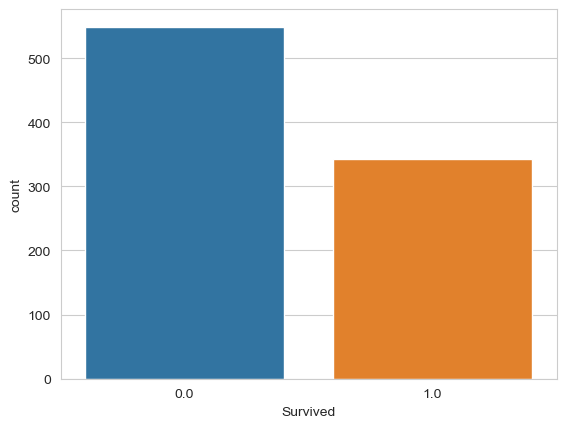

In [25]:
def titanic_func(data, column, count=True):
    print(f'Quantidade de valores únicos: {data[column].nunique()}')
    print(f'\nQuais são os valores únicos: {data[column].unique()}')
    print(f'\nQuantidade de valores nulos: {data[column].isnull().sum()}')
    print(f'\nQuantidade por opção: \n{data[column].value_counts()}')
    
    if count == True:
        sns.countplot(data = data, x = column, hue = 'Survived', legend = False)
    else:
        sns.displot(data[column], kde = True)
                    
titanic_func(titanic_df, 'Survived')

In [26]:
df['Survived'] = titanic_df['Survived']

In [27]:
df

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
1304,NaN
1305,NaN
1306,NaN
1307,NaN


###Pclass


Quantidade de valores únicos: 3

Quais são os valores únicos: [3 1 2]

Quantidade de valores nulos: 0

Quantidade por opção: 
Pclass
3    709
1    323
2    277
Name: count, dtype: int64


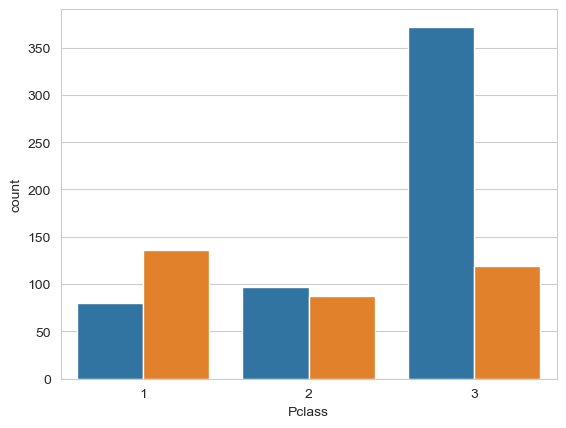

In [28]:
titanic_func(titanic_df, 'Pclass')

In [29]:
df['Pclass'] =  titanic_df['Pclass']
df

,Survived,Pclass
0,0.0,3
1,1.0,1
2,1.0,3
3,1.0,1
4,0.0,3
...,...,...
1304,NaN,3
1305,NaN,1
1306,NaN,3
1307,NaN,3


In [30]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###Sex

In [31]:
pd.set_option('future.no_silent_downcasting', True)

In [32]:
#titanic_df['Sex'].map({'female':1, 'male':0})
titanic_df['Sex'] = titanic_df['Sex'].replace(['male', 'female'],[0,1]).astype(int)

Quantidade de valores únicos: 2

Quais são os valores únicos: [0 1]

Quantidade de valores nulos: 0

Quantidade por opção: 
Sex
0    843
1    466
Name: count, dtype: int64


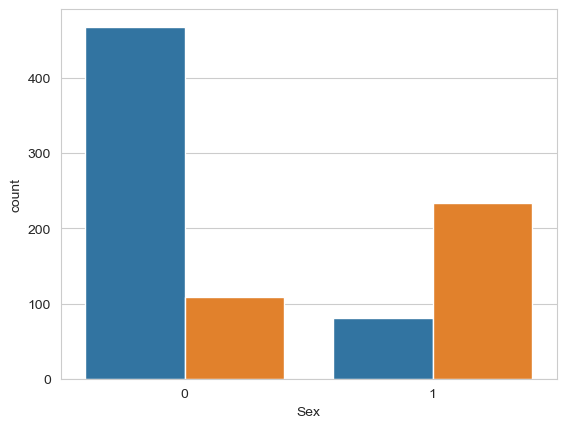

In [33]:
titanic_func(titanic_df, 'Sex')

In [34]:
df['Sex'] = titanic_df['Sex']
df

,Survived,Pclass,Sex
0,0.0,3,0
1,1.0,1,1
2,1.0,3,1
3,1.0,1,1
4,0.0,3,0
...,...,...,...
1304,NaN,3,0
1305,NaN,1,1
1306,NaN,3,0
1307,NaN,3,0


In [35]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


###Age

Quantidade de valores únicos: 98

Quais são os valores únicos: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]

Quantidade de valores nulos: 263

Quantidade por opção: 
Age
24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
60.50     1
11.50     1
0.33      1
0.17      1
38.50     1
Name: count, Length: 98, dtype: int64


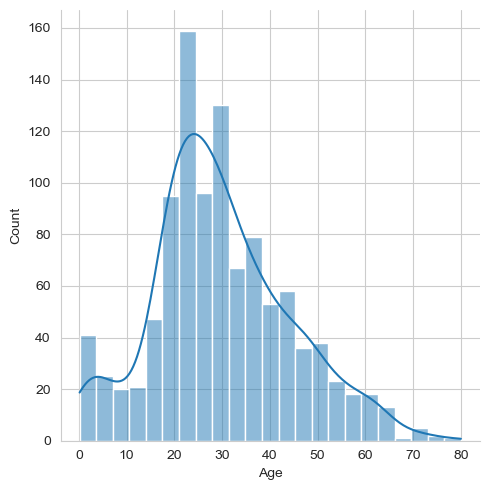

In [36]:
titanic_func(titanic_df, 'Age', False)

In [37]:
titanic_df['Age'].mean()

np.float64(29.881137667304014)

In [38]:
titanic_df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,-0.013406,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.124617,-0.408106,0.060832,0.018322,-0.558629
Sex,-0.013406,0.543351,-0.124617,1.000000,-0.063645,0.109609,0.213125,0.185523
Age,0.028814,-0.077221,-0.408106,-0.063645,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,0.109609,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,0.213125,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.185523,0.178740,0.160238,0.221539,1.000000


In [39]:
titanic_df[titanic_df['Pclass'] == 1]['Age'].mean()

np.float64(39.15992957746479)

In [40]:
titanic_df[titanic_df['Pclass'] == 2]['Age'].mean()

np.float64(29.506704980842912)

In [41]:
titanic_df[titanic_df['Pclass'] == 3]['Age'].mean()

np.float64(24.81636726546906)

In [42]:
for i in sorted(titanic_df['Pclass'].unique()):
    print(f"Pessoas da {i}ª classe tem a média de: {titanic_df[titanic_df['Pclass'] == i]['Age'].mean()}")

Pessoas da 1ª classe tem a média de: 39.15992957746479
Pessoas da 2ª classe tem a média de: 29.506704980842912
Pessoas da 3ª classe tem a média de: 24.81636726546906


In [43]:
titanic_df['Age'].isnull().sum()

np.int64(263)

In [44]:
round(titanic_df[titanic_df['Pclass'] == 1]['Age'].mean())

39

In [45]:
for i in titanic_df.index:
    if pd.isnull(titanic_df['Age'][i]):
        if titanic_df['Pclass'][i] == 1:
            titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 1]['Age'].mean())
        elif titanic_df['Pclass'][i] == 2:
            titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 2]['Age'].mean())
        elif titanic_df['Pclass'][i] == 3:
            titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 3]['Age'].mean())
    else:
        continue
            


C:\Users\douglas.ribeiro\AppData\Local\Temp\ipykernel_12152\1604922467.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 3]['Age'].mean())
C:\Users\douglas.ribeiro\AppData\Loc

In [46]:
titanic_df[titanic_df['Pclass'] == 1]['Age'].isnull().sum()

np.int64(0)

In [47]:
df['Age'] = titanic_df['Age']

In [48]:
df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
dtype: int64

###SibSp

Quantidade de valores únicos: 7

Quais são os valores únicos: [1 0 3 4 2 5 8]

Quantidade de valores nulos: 0

Quantidade por opção: 
SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64


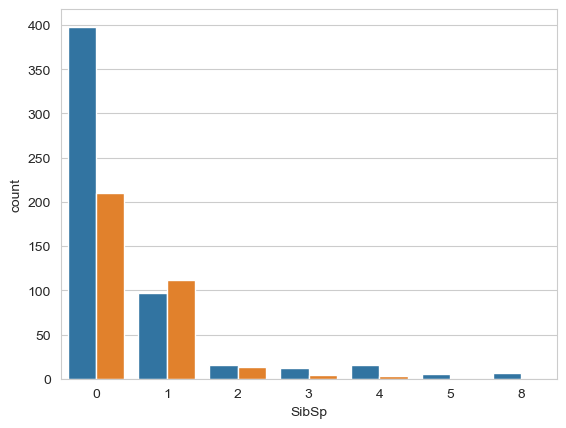

In [49]:
titanic_func(titanic_df, 'SibSp')

In [50]:
df['SibSp'] = titanic_df['SibSp']
df

,Survived,Pclass,Sex,Age,SibSp
0,0.0,3,0,22.0,1
1,1.0,1,1,38.0,1
2,1.0,3,1,26.0,0
3,1.0,1,1,35.0,1
4,0.0,3,0,35.0,0
...,...,...,...,...,...
1304,NaN,3,0,25.0,0
1305,NaN,1,1,39.0,0
1306,NaN,3,0,38.5,0
1307,NaN,3,0,25.0,0


###Parch


Quantidade de valores únicos: 8

Quais são os valores únicos: [0 1 2 5 3 4 6 9]

Quantidade de valores nulos: 0

Quantidade por opção: 
Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64


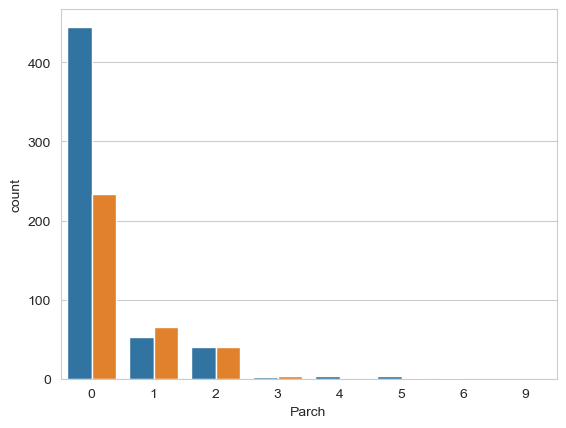

In [51]:
titanic_func(titanic_df, 'Parch')

In [52]:
df['Parch'] = titanic_df['Parch']
df

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0.0,3,0,22.0,1,0
1,1.0,1,1,38.0,1,0
2,1.0,3,1,26.0,0,0
3,1.0,1,1,35.0,1,0
4,0.0,3,0,35.0,0,0
...,...,...,...,...,...,...
1304,NaN,3,0,25.0,0,0
1305,NaN,1,1,39.0,0,0
1306,NaN,3,0,38.5,0,0
1307,NaN,3,0,25.0,0,0


###Family Size

In [53]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

In [54]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [55]:
df['FamilySize'] = titanic_df['FamilySize']

###Fare

Quantidade de valores únicos: 281

Quais são os valores únicos: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      1

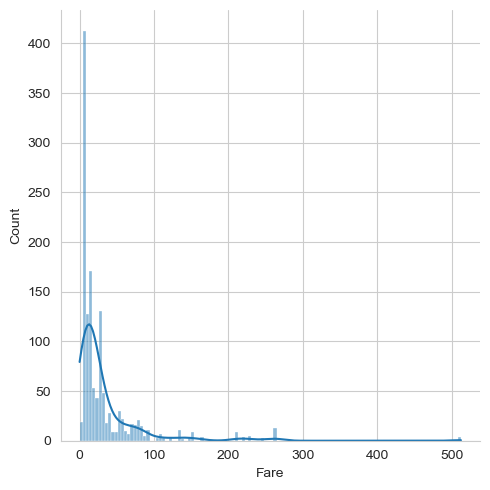

In [56]:
titanic_func(titanic_df, 'Fare', False)

In [57]:
titanic_df[titanic_df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
1043,1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,1


In [58]:
titanic_df[titanic_df['Pclass'] == 3]['Fare'].mean()

np.float64(13.302888700564973)

In [59]:
titanic_df['Fare'].fillna(titanic_df[titanic_df['Pclass'] == 3]['Fare'].mean(), inplace = True)

C:\Users\douglas.ribeiro\AppData\Local\Temp\ipykernel_12152\3114056951.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Fare'].fillna(titanic_df[titanic_df['Pclass'] == 3]['Fare'].mean(), inplace = True)


In [60]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
FamilySize        0
dtype: int64

In [61]:
df['Fare'] = titanic_df['Fare']

In [62]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare
0,0.0,3,0,22.0,1,0,2,7.2500
1,1.0,1,1,38.0,1,0,2,71.2833
2,1.0,3,1,26.0,0,0,1,7.9250
3,1.0,1,1,35.0,1,0,2,53.1000
4,0.0,3,0,35.0,0,0,1,8.0500
...,...,...,...,...,...,...,...,...
1304,NaN,3,0,25.0,0,0,1,8.0500
1305,NaN,1,1,39.0,0,0,1,108.9000
1306,NaN,3,0,38.5,0,0,1,7.2500
1307,NaN,3,0,25.0,0,0,1,8.0500


###Cabin

In [63]:
titanic_df['Cabin'].isnull().sum()

np.int64(1014)

In [64]:
titanic_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

###Embarked

Quantidade de valores únicos: 3

Quais são os valores únicos: ['S' 'C' 'Q' nan]

Quantidade de valores nulos: 2

Quantidade por opção: 
Embarked
S    914
C    270
Q    123
Name: count, dtype: int64


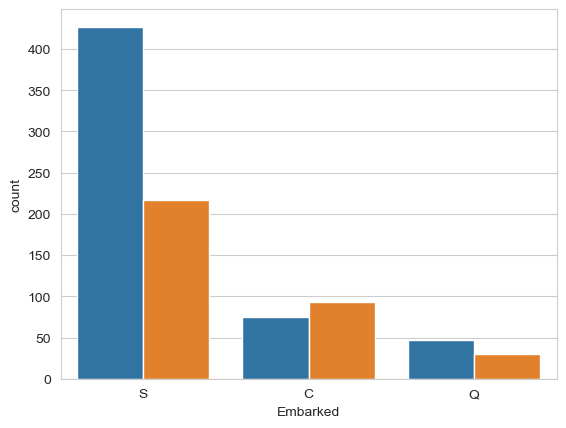

In [65]:
titanic_func(titanic_df, 'Embarked')

In [66]:
titanic_df[titanic_df['Embarked'] == 'S']['Survived'].mean()

np.float64(0.33695652173913043)

In [67]:
titanic_df[titanic_df['Embarked'] == 'S']['Pclass'].mean()

np.float64(2.3479212253829322)

In [68]:
titanic_df[titanic_df['Embarked'] == 'C']['Survived'].mean()

np.float64(0.5535714285714286)

In [69]:
titanic_df[titanic_df['Embarked'] == 'C']['Pclass'].mean()

np.float64(1.8518518518518519)

In [70]:
titanic_df[titanic_df['Embarked'] == 'Q']['Survived'].mean()

np.float64(0.38961038961038963)

In [71]:
titanic_df[titanic_df['Embarked'] == 'Q']['Pclass'].mean()

np.float64(2.894308943089431)

In [72]:
titanic_df[titanic_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,1
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,1


In [73]:
titanic_df['Embarked'].fillna("C", inplace = True)

C:\Users\douglas.ribeiro\AppData\Local\Temp\ipykernel_12152\2011333566.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Embarked'].fillna("C", inplace = True)


In [74]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
FamilySize        0
dtype: int64

In [75]:
df['Embarked'] = titanic_df['Embarked']
df

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Embarked
0,0.0,3,0,22.0,1,0,2,7.2500,S
1,1.0,1,1,38.0,1,0,2,71.2833,C
2,1.0,3,1,26.0,0,0,1,7.9250,S
3,1.0,1,1,35.0,1,0,2,53.1000,S
4,0.0,3,0,35.0,0,0,1,8.0500,S
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,25.0,0,0,1,8.0500,S
1305,NaN,1,1,39.0,0,0,1,108.9000,C
1306,NaN,3,0,38.5,0,0,1,7.2500,S
1307,NaN,3,0,25.0,0,0,1,8.0500,S


In [76]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


###Name

In [77]:
titanic_df['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [87]:
#[titanic_df['Name'][n].split(',')[1].split('.')[0].strip() for n in titanic_df.index]
titanic_df['Title'] = titanic_df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [88]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,25.0,0,0,A.5. 3236,8.0500,NaN,S,1,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,1,Dona
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",0,25.0,0,0,359309,8.0500,NaN,S,1,Mr


In [89]:
titanic_df['Title'].nunique()

18

In [90]:
titanic_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [91]:
titanic_df['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
Don               1
Sir               1
Lady              1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [93]:
titanic_df['Title'] = [n if n in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Person' for n in titanic_df['Title']]

In [94]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,Mr


In [96]:
titanic_df['Title'].nunique()

5

In [97]:
titanic_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Person'], dtype=object)

In [95]:
df['Title'] = titanic_df['Title']

Quantidade de valores únicos: 5

Quais são os valores únicos: ['Mr' 'Mrs' 'Miss' 'Master' 'Person']

Quantidade de valores nulos: 0

Quantidade por opção: 
Title
Mr        757
Miss      260
Mrs       197
Master     61
Person     34
Name: count, dtype: int64


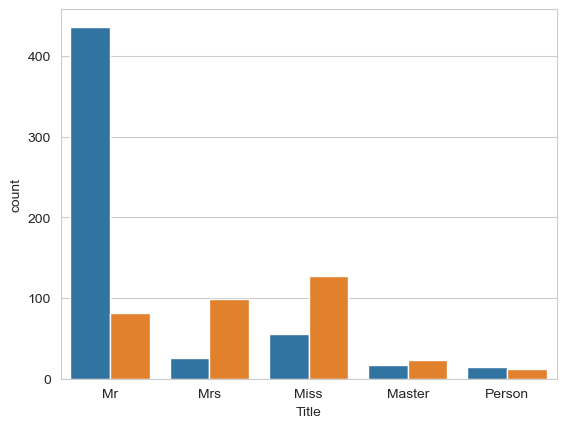

In [99]:
titanic_func(titanic_df, 'Title')

In [100]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Embarked,Title
0,0.0,3,0,22.0,1,0,2,7.2500,S,Mr
1,1.0,1,1,38.0,1,0,2,71.2833,C,Mrs
2,1.0,3,1,26.0,0,0,1,7.9250,S,Miss
3,1.0,1,1,35.0,1,0,2,53.1000,S,Mrs
4,0.0,3,0,35.0,0,0,1,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,25.0,0,0,1,8.0500,S,Mr
1305,NaN,1,1,39.0,0,0,1,108.9000,C,Person
1306,NaN,3,0,38.5,0,0,1,7.2500,S,Mr
1307,NaN,3,0,25.0,0,0,1,8.0500,S,Mr


In [106]:
pclass = pd.get_dummies(df['Pclass'], dtype=int, prefix='Pclass', drop_first= True)
title = pd.get_dummies(df['Title'], dtype=int, prefix='Title', drop_first= True)
embarked = pd.get_dummies(df['Embarked'], dtype=int, prefix='Embarked', drop_first= True)

In [108]:
titanic_completo = pd.concat([df, pclass, title, embarked], axis = 1)

In [110]:
titanic_completo.drop(['Pclass', 'Title', 'Embarked'], axis = 1, inplace=True)

In [111]:
titanic_completo

,Survived,Sex,Age,SibSp,Parch,FamilySize,Fare,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S
0,0.0,0,22.0,1,0,2,7.2500,0,1,0,1,0,0,0,1
1,1.0,1,38.0,1,0,2,71.2833,0,0,0,0,1,0,0,0
2,1.0,1,26.0,0,0,1,7.9250,0,1,1,0,0,0,0,1
3,1.0,1,35.0,1,0,2,53.1000,0,0,0,0,1,0,0,1
4,0.0,0,35.0,0,0,1,8.0500,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0,25.0,0,0,1,8.0500,0,1,0,1,0,0,0,1
1305,NaN,1,39.0,0,0,1,108.9000,0,0,0,0,0,1,0,0
1306,NaN,0,38.5,0,0,1,7.2500,0,1,0,1,0,0,0,1
1307,NaN,0,25.0,0,0,1,8.0500,0,1,0,1,0,0,0,1


In [113]:
train = titanic_completo[:train_index].copy()
test = titanic_completo[test_index:].copy()

In [114]:
train

,Survived,Sex,Age,SibSp,Parch,FamilySize,Fare,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S
0,0.0,0,22.0,1,0,2,7.2500,0,1,0,1,0,0,0,1
1,1.0,1,38.0,1,0,2,71.2833,0,0,0,0,1,0,0,0
2,1.0,1,26.0,0,0,1,7.9250,0,1,1,0,0,0,0,1
3,1.0,1,35.0,1,0,2,53.1000,0,0,0,0,1,0,0,1
4,0.0,0,35.0,0,0,1,8.0500,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0,27.0,0,0,1,13.0000,1,0,0,0,0,1,0,1
887,1.0,1,19.0,0,0,1,30.0000,0,0,1,0,0,0,0,1
888,0.0,1,25.0,1,2,4,23.4500,0,1,1,0,0,0,0,1
889,1.0,0,26.0,0,0,1,30.0000,0,0,0,1,0,0,0,0


In [117]:
train['Survived'] =  train['Survived'].astype(int)


In [120]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [122]:
X_test = test.drop('Survived', axis = 1)

In [124]:
def func_acuracia(algoritmo, X_train, y_train, vc): #cross validation
    modelo = algoritmo.fit(X_train, y_train)
    acuracia = round(modelo.score(X_train, y_train) * 100, 2)
    
    train_pred = model_selection.cross_val_predict(algoritmo, X_train, y_train, cv = vc, n_jobs = -1)
    acuracia_vc = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return acuracia, acuracia_vc

In [126]:
#Random Forest

acc_rf, acc_vc_rf = func_acuracia(RandomForestClassifier(), X, y, 10)

print(f'Acurácia: {acc_rf}')
print(f'Acurácia validação Cruzada: {acc_vc_rf}')

Acurácia: 98.32
Acurácia validação Cruzada: 80.81


In [127]:
#Logistic Regression
acc_log, acc_vc_log = func_acuracia(LogisticRegression(max_iter= 1000), X, y, 10)

print(f'Acurácia: {acc_log}')
print(f'Acurácia validação Cruzada: {acc_vc_log}')

Acurácia: 82.94
Acurácia validação Cruzada: 82.38


In [128]:
# K-Nearest Neighbours

acc_knn, acc_vc_knn = func_acuracia(KNeighborsClassifier(), X, y, 10)

print(f'Acurácia: {acc_knn}')
print(f'Acurácia validação Cruzada: {acc_vc_knn}')

Acurácia: 80.81
Acurácia validação Cruzada: 72.39


In [129]:
# Gaussian Naive Bayes

acc_gaussian, acc_vc_gaussian = func_acuracia(GaussianNB(), X, y, 10)

print(f'Acurácia: {acc_gaussian}')
print(f'Acurácia validação Cruzada: {acc_vc_gaussian}')


Acurácia: 78.79
Acurácia validação Cruzada: 78.56


In [130]:
# Linear Support Vector Machines (SVC)

acc_linear_svc, acc_vc_linear_svc= func_acuracia(LinearSVC(dual = False), X, y, 10)

print(f'Acurácia: {acc_linear_svc}')
print(f'Acurácia validação Cruzada: {acc_vc_linear_svc}')


Acurácia: 83.28
Acurácia validação Cruzada: 82.72


In [131]:
# Stochastic Gradient Descent

acc_sgd, acc_vc_sgd = func_acuracia(SGDClassifier(), X, y, 10)

print(f'Acurácia: {acc_sgd}')
print(f'Acurácia validação Cruzada: {acc_vc_sgd}')

Acurácia: 76.77
Acurácia validação Cruzada: 74.07


In [133]:
# Decision Tree Classifiers

acc_dt, acc_vc_dt = func_acuracia(DecisionTreeClassifier(), X, y, 10)

print(f'Acurácia: {acc_dt}')
print(f'Acurácia validação Cruzada: {acc_vc_dt}')

Acurácia: 98.32
Acurácia validação Cruzada: 79.69


In [134]:
# Gradient Boost Trees

acc_gbt, acc_vc_gbt = func_acuracia(GradientBoostingClassifier(), X, y, 10)

print(f'Acurácia: {acc_gbt}')
print(f'Acurácia validação Cruzada: {acc_vc_gbt}')

Acurácia: 89.67
Acurácia validação Cruzada: 83.16


In [ ]:
###Hyperparametros